# Analyzing Global Education Trends

#### *Author*: Disha Padia 

### *pandas, numpy, matplotlib, seaborn*

## Introduction

This study focuses on an in-depth analysis of global education with the goal of understanding the complex dynamics that influence worldwide education.
Focusing on important factors such as, completion and enrollment rates, along with socioeconomic variables including birth and unemployment rates, this analysis explores the intricate relationships that shape the current level of education worldwide.

The Kaggle dataset, World Educational Data [1] provides many aspects of education in various countries and areas.

The primary question that drives our investigation is: "What insights can be obtained from these relationships to inform positive changes on a global scale, and how do various educational indicators and socio-economic factors influence the present situation of worldwide education?"

Our goal as we explore the complex structure of data will be to shed light on statistical patterns, and highlighting the intricate details of academic successes and challenges.


## Methods

### *Data Collection*

The data is obtained from Kaggle, a source of public datasets.[1]

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

# reading the csv file
global_education= pd.read_csv("Global_Education.csv")

###  Data Cleaning

In [ ]:
# renaming some column titles for displaying purposes
global_education.rename(columns={'Countries and areas': 'Countries'}, inplace=True)

# Merging columns to make it easier to understand data

#   Combining primary, lower secondary and upper secondary for both genders and then combining the male rate and the female rate to come up with a total completion rate
global_education['Completion_Rate_Males'] = global_education['Completion_Rate_Primary_Male'] + global_education['Completion_Rate_Lower_Secondary_Male'] + global_education['Completion_Rate_Upper_Secondary_Male']
global_education['Completion_Rate_Females'] = global_education['Completion_Rate_Primary_Female'] + global_education['Completion_Rate_Lower_Secondary_Female'] + global_education['Completion_Rate_Upper_Secondary_Female']
global_education['Total_Completion_Rate'] = global_education['Completion_Rate_Females'] + global_education['Completion_Rate_Males']

#   Combining primary, lower secondary and upper secondary for both genders and then combining the male rate and the female rate to come up with a total out of school rate
global_education['Out_of_School_Males'] = global_education['OOSR_Pre0Primary_Age_Male'] + global_education['OOSR_Primary_Age_Male'] + global_education['OOSR_Lower_Secondary_Age_Male'] + global_education['OOSR_Upper_Secondary_Age_Male']
global_education['Out_of_School_Females'] = global_education['OOSR_Pre0Primary_Age_Female'] + global_education['OOSR_Primary_Age_Female'] + global_education['OOSR_Lower_Secondary_Age_Female'] + global_education['OOSR_Upper_Secondary_Age_Female']
global_education['Out_of_School_Children'] = global_education['Out_of_School_Females'] + global_education['Out_of_School_Males']

#   Combining the enrollment for the primary and tertiary education, to get a better overview of how many children are enrolled in total
global_education['Gross_Enrollment'] = global_education['Gross_Primary_Education_Enrollment'] + global_education['Gross_Tertiary_Education_Enrollment']

#   Combining math proeficiency to utilize in the analysis
global_education['Math_Proeficiency'] = global_education['Grade_2_3_Proficiency_Math'] + global_education['Primary_End_Proficiency_Math'] + global_education['Lower_Secondary_End_Proficiency_Math']

#   Combining reading proeficiency to utilize in the analysis
global_education['Reading_Proeficiency'] = global_education['Grade_2_3_Proficiency_Reading'] + global_education['Primary_End_Proficiency_Reading'] + global_education['Lower_Secondary_End_Proficiency_Reading']

#   Combining youth literacy to utilize in the analysis
global_education['Youth_Literacy'] = global_education['Youth_15_24_Literacy_Rate_Male'] + global_education['Youth_15_24_Literacy_Rate_Female']

#Removing uneccesary and individual columns that are merged into one [8]
remove_coluumns=global_education.columns[global_education.columns.str.contains('Education_Enrollment|Secondary|Primary|Grade|Youth|Lat|Long')]
global_education.drop(columns=remove_coluumns)

,Countries,Birth_Rate,Unemployment_Rate,Completion_Rate_Males,Completion_Rate_Females,Total_Completion_Rate,Out_of_School_Males,Out_of_School_Females,Out_of_School_Children,Gross_Enrollment,Math_Proeficiency,Reading_Proeficiency
0,Afghanistan,32.49,11.12,148,80,228,44,69,113,113.7,36,35
1,Albania,11.78,12.33,268,273,541,37,21,58,162.0,58,48
2,Algeria,24.28,11.70,164,195,359,0,0,0,161.3,19,21
3,Andorra,7.20,0.00,0,0,0,0,0,0,106.4,0,0
4,Angola,40.73,6.89,129,104,233,31,39,70,122.8,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
197,Venezuela,17.88,8.80,0,0,0,67,56,123,176.5,0,0
198,Vietnam,16.75,2.01,227,245,472,0,0,0,139.1,132,141
199,Yemen,30.45,12.91,162,117,279,175,219,394,103.8,0,0
200,Zambia,36.19,11.43,158,150,308,17,13,30,102.8,2,5


## *Analysis*

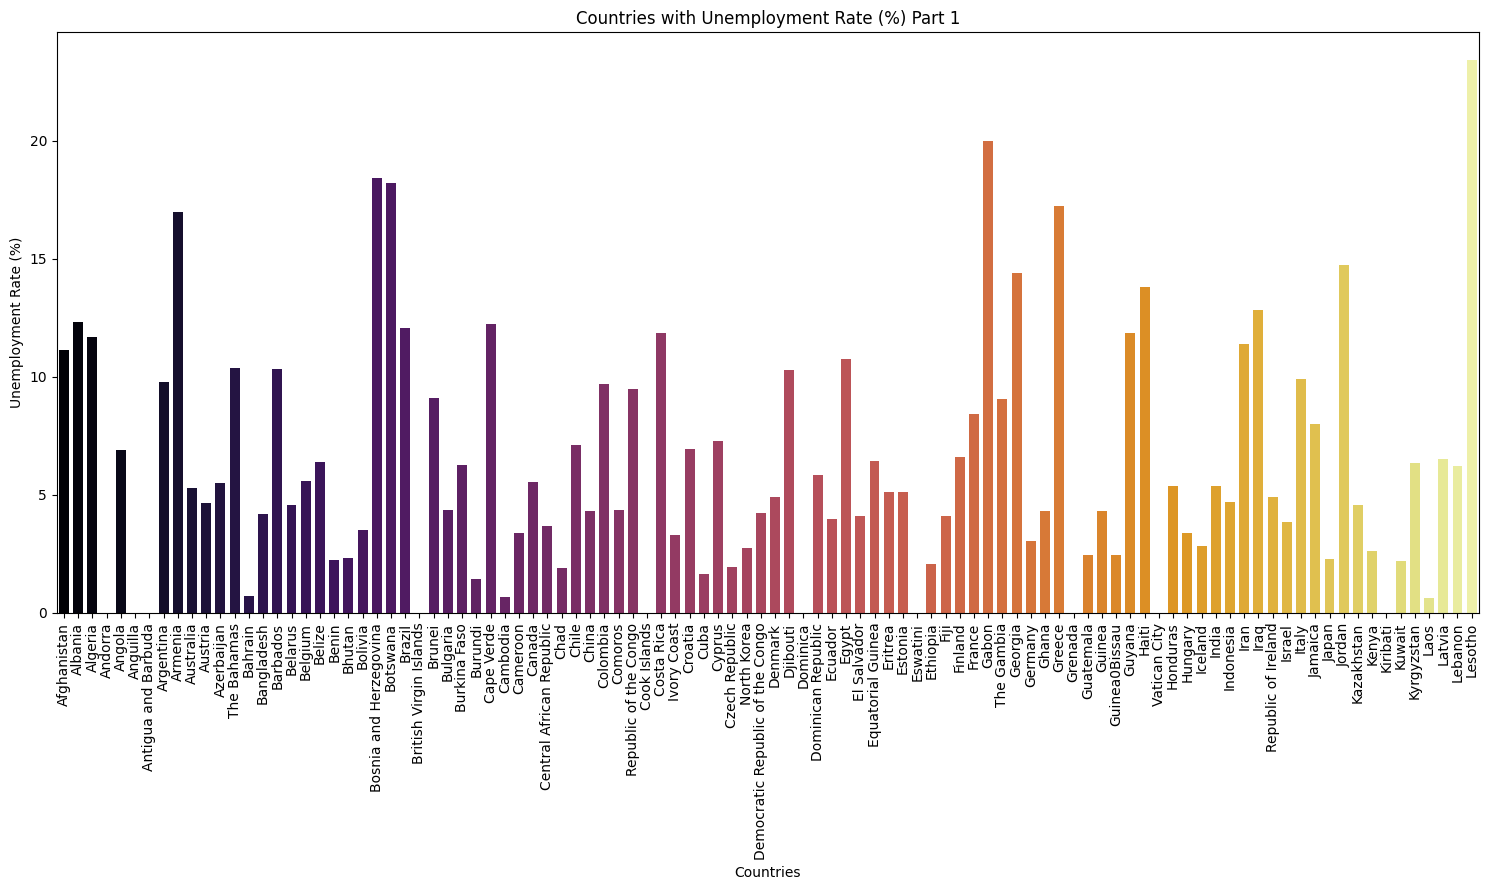

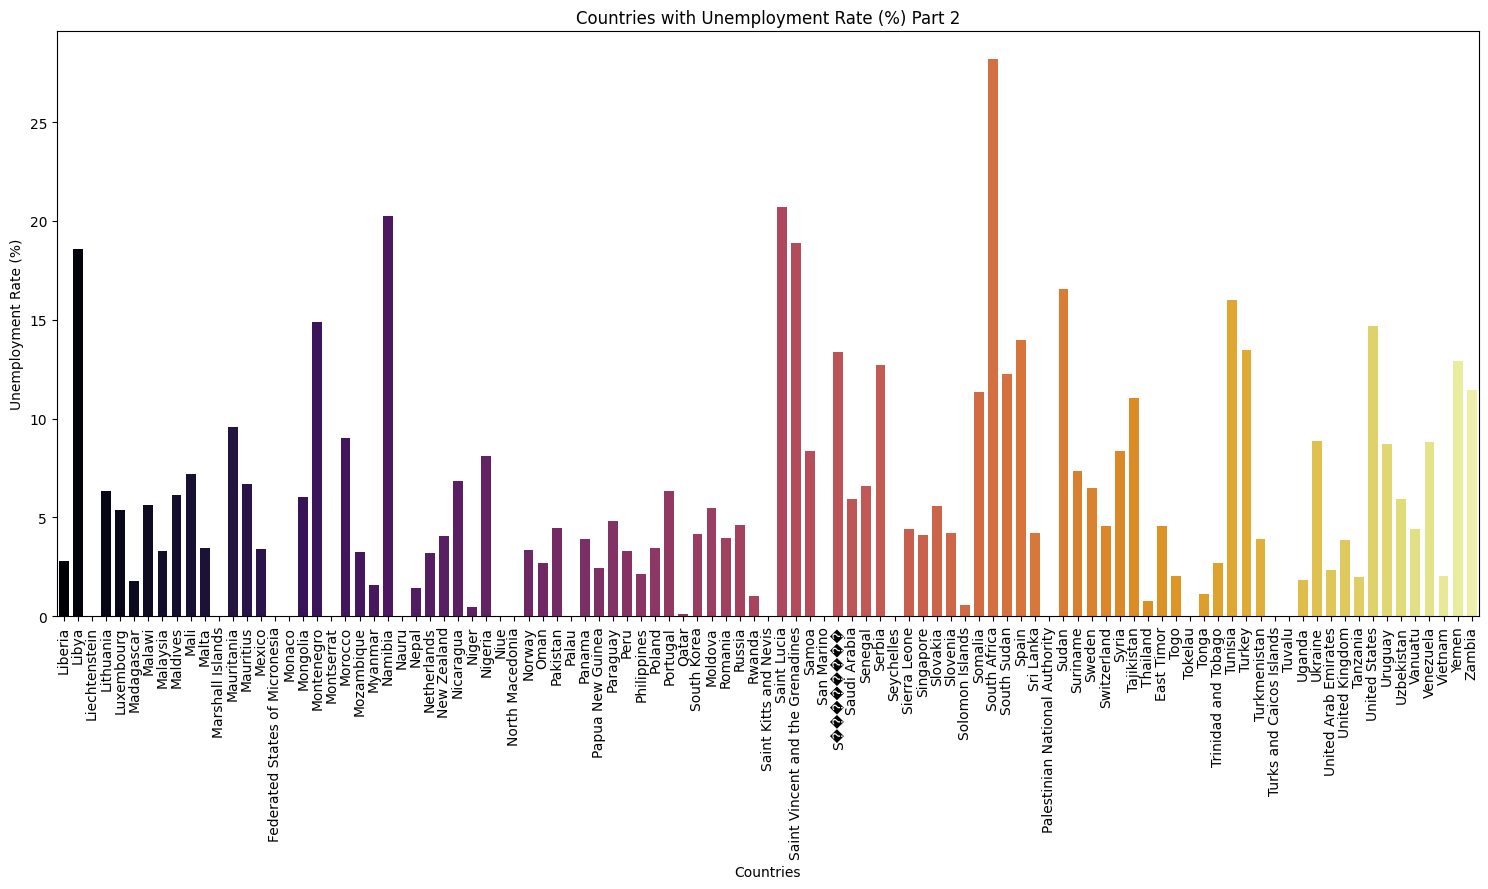

In [ ]:
# Plotting bar charts for unemployment rates in the world

# Getting data for first 100 countries [7]
first_hundred_countries = global_education.head(100)

# Setting the size of the first hundred countries graph to display [7]
plt.figure(figsize=(15, 9))
# Plotting bar chart for unemployment rates in the first 100 countries
bar_width = 0.7
sns.barplot(x='Countries', y='Unemployment_Rate', data=first_hundred_countries, hue='Countries', palette='inferno', width=bar_width, legend=False)

# Adding the title, x and y labels to the bar graph
plt.xlabel('Countries')
plt.ylabel('Unemployment Rate (%)')
plt.title('Countries with Unemployment Rate (%) Part 1')

# Adjusting layout for better visualization
plt.xticks(rotation=90)
plt.tight_layout()

# Displaying the plot
plt.show()

# Getting data for remaining countries (101 to 200) [7]
remaining_countries = global_education.iloc[100:201]

# Setting the size of the remaining countries graph to display [7]
plt.figure(figsize=(15, 9))

# Plotting bar chart for unemployment rates in remaining countries
bar_width = 0.7
sns.barplot(x='Countries', y='Unemployment_Rate', data=remaining_countries, hue='Countries', palette='inferno', width=bar_width, legend=False)

# Adding title, x and y labels to the bar graph
plt.xlabel('Countries')
plt.ylabel('Unemployment Rate (%)')
plt.title('Countries with Unemployment Rate (%) Part 2')

# Adjusting layout for better visualization
plt.xticks(rotation=90)
plt.tight_layout()

# Display [9]
plt.show()


# *The bar graphs above are separated into two for easy visualization:*

 The bar graphs show a range of unemployment, from none to almost 30%, this is due to the job market conditions currently, and overpopulation in some areas. The countries with the highest unemployment rates are South Africa, Lesotho, Saint Lucia, Namibia, and Gabon, from highest to lowest, that have unemployment rate above 20%. This indicates a likely chance of people not completing education, or overpopulation or some educational barriers.

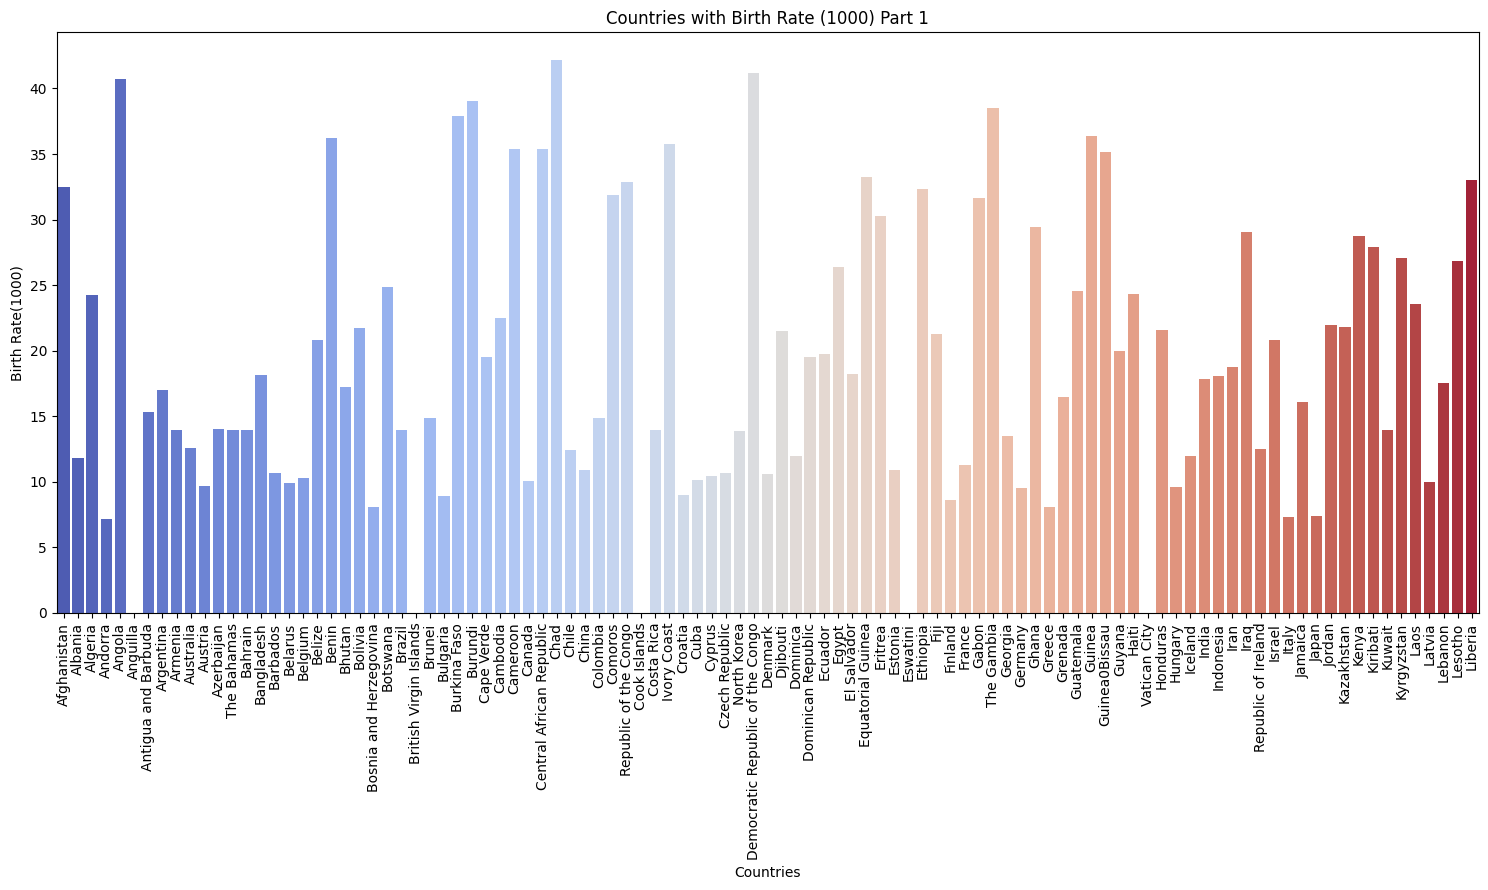

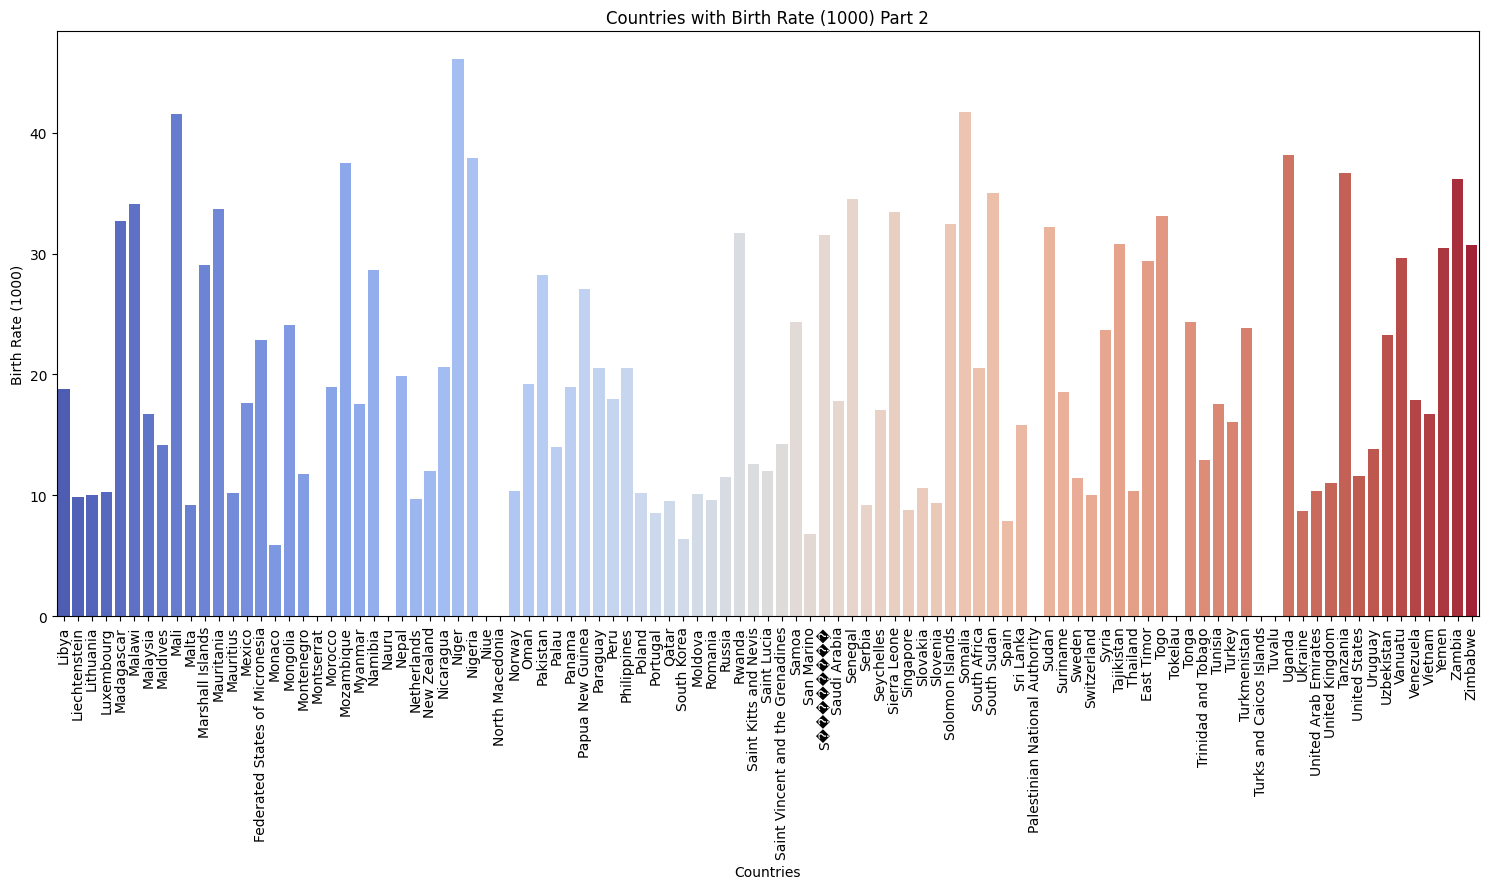

In [ ]:
# Plotting bar charts for birth rates in the world

# Setting the size of the graph to display [7]
plt.figure(figsize=(15, 9))

# Plotting bar charts for birth rates in the first 100 countries
bar_width = 0.7
sns.barplot(x='Countries', y='Birth_Rate', data=global_education.head(101), hue='Countries', palette='coolwarm', legend=False)

# Adding the title, x and y labels to the bar graph
plt.xlabel('Countries')
plt.ylabel('Birth Rate(1000)')
plt.title('Countries with Birth Rate (1000) Part 1')

# Adjusting layout for better visualization
plt.xticks(rotation=90)
plt.tight_layout()

# Display
plt.show()

# Remaining countries
plt.figure(figsize=(15, 9))
bar_width = 0.7
sns.barplot(x='Countries', y='Birth_Rate', data=global_education.iloc[101:202], hue='Countries', palette='coolwarm', legend=False)

# Adding the title, x and y labels to the bar graph
plt.xlabel('Countries')
plt.ylabel('Birth Rate (1000)')
plt.title('Countries with Birth Rate (1000) Part 2')

# Adjusting layout for better visualization
plt.xticks(rotation=90)
plt.tight_layout()

# Display [9]
plt.show()


# *The bar graphs above are separated into two for easy visualization:*
The birth rates per 1000 people in each country, vary a lot, because there are countries with 0 per 1000 people,and there are countroes with more than 50 births per 1000. The fact that there are no births for some countries mean that the time the data was conducted, no babies were born, people were in school or much older. The highest birth rates are in Niger, Chad, Angolia, Demogratic Repuplic of the Congo, Mali, and Somalia, from highest to lowest, that have more than 40 births per 1000 people. This will lead to chaos in the countries' education and eventaully have an impact on the job market, making it harder for them if they decide to stay in the same country for long.

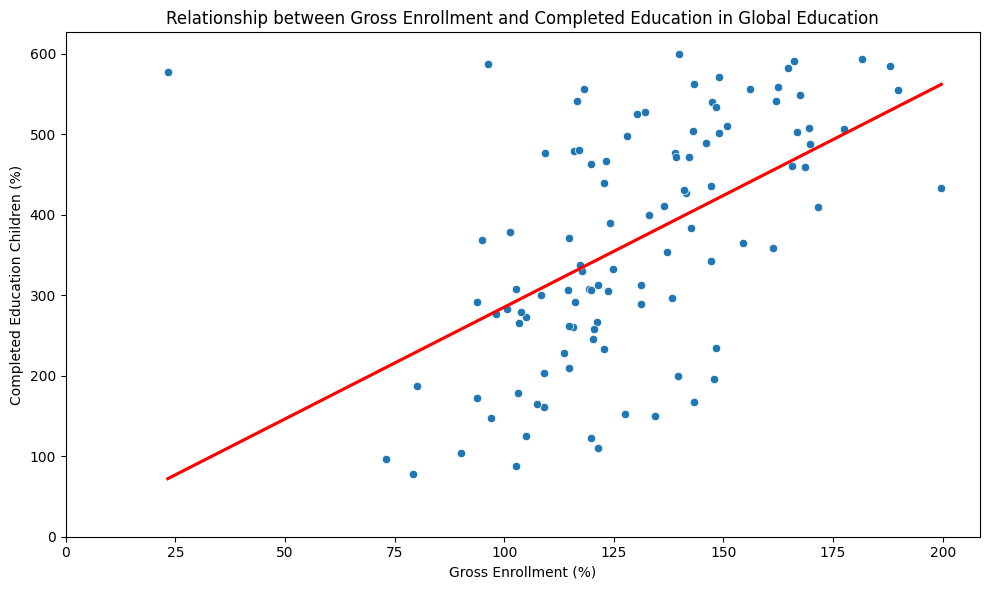

In [ ]:
# Plotting a scatter plot with its line of best fit for the relationship between Gross Enrollment and the Completed Education

# Setting the size of the graph to display [7]
plt.figure(figsize=(10, 6))

# Filter data to exclude zero values [6 How do I remove 0 values only in two columns of data in python]
data = global_education[(global_education['Gross_Enrollment'] != 0) & (global_education['Total_Completion_Rate'] != 0)]

# Scatterplot
sns.scatterplot(x='Gross_Enrollment', y='Total_Completion_Rate', data=data)

# Line of best fit [6 How do I create a line of best fit using seaborn]
sns.regplot(x='Gross_Enrollment', y='Total_Completion_Rate', data=data, scatter=False, line_kws={'linestyle':'-'}, ci=None, color='red')

# Setting ranges to include positive values only [6 How do I set my values on the x and y axis to show positive values only]
plt.ylim(bottom=0)
plt.xlim(left=0)

# Adding title, x and y labels to the scatterplot
plt.xlabel('Gross Enrollment (%)')
plt.ylabel('Completed Education Children (%)')
plt.title('Relationship between Gross Enrollment and Completed Education in Global Education')

# Adjusting layout for better visualization
plt.tight_layout()

# Display [9]
plt.show()

In [ ]:
mean_gross_enrollment = global_education['Gross_Enrollment'].mean().round(2)
print(mean_gross_enrollment)

mean_completed_education = global_education['Total_Completion_Rate'].mean().round(2)
print(mean_completed_education)

129.34
195.51


# *The scatterplot shows a positive moderate corelation between Gross Enrollment and Completed Education Children*:
As gross enrollment increases, the higher chance of the children completing their education. However, there are some mild and extreme outliers present. 
The gross enrollment exceeds 100% because more then the total eligible population is enrolled. This happens when there could be students enrolled in multiple programs, re-enrolling and etc.
The Completed Education Children exceeds 100% when a child has completed more than one education level, ie. Completing primary, lower secondary and upper secondary school. 
The scatterplot overall shows how many children completed their education, how many left their education mid-way due to some unknown reasons, all depending how many are enrolled at first. The completion rate mean is a lot higher, compared to the enrollment, showing a general trend that most children who enrol complete their education.

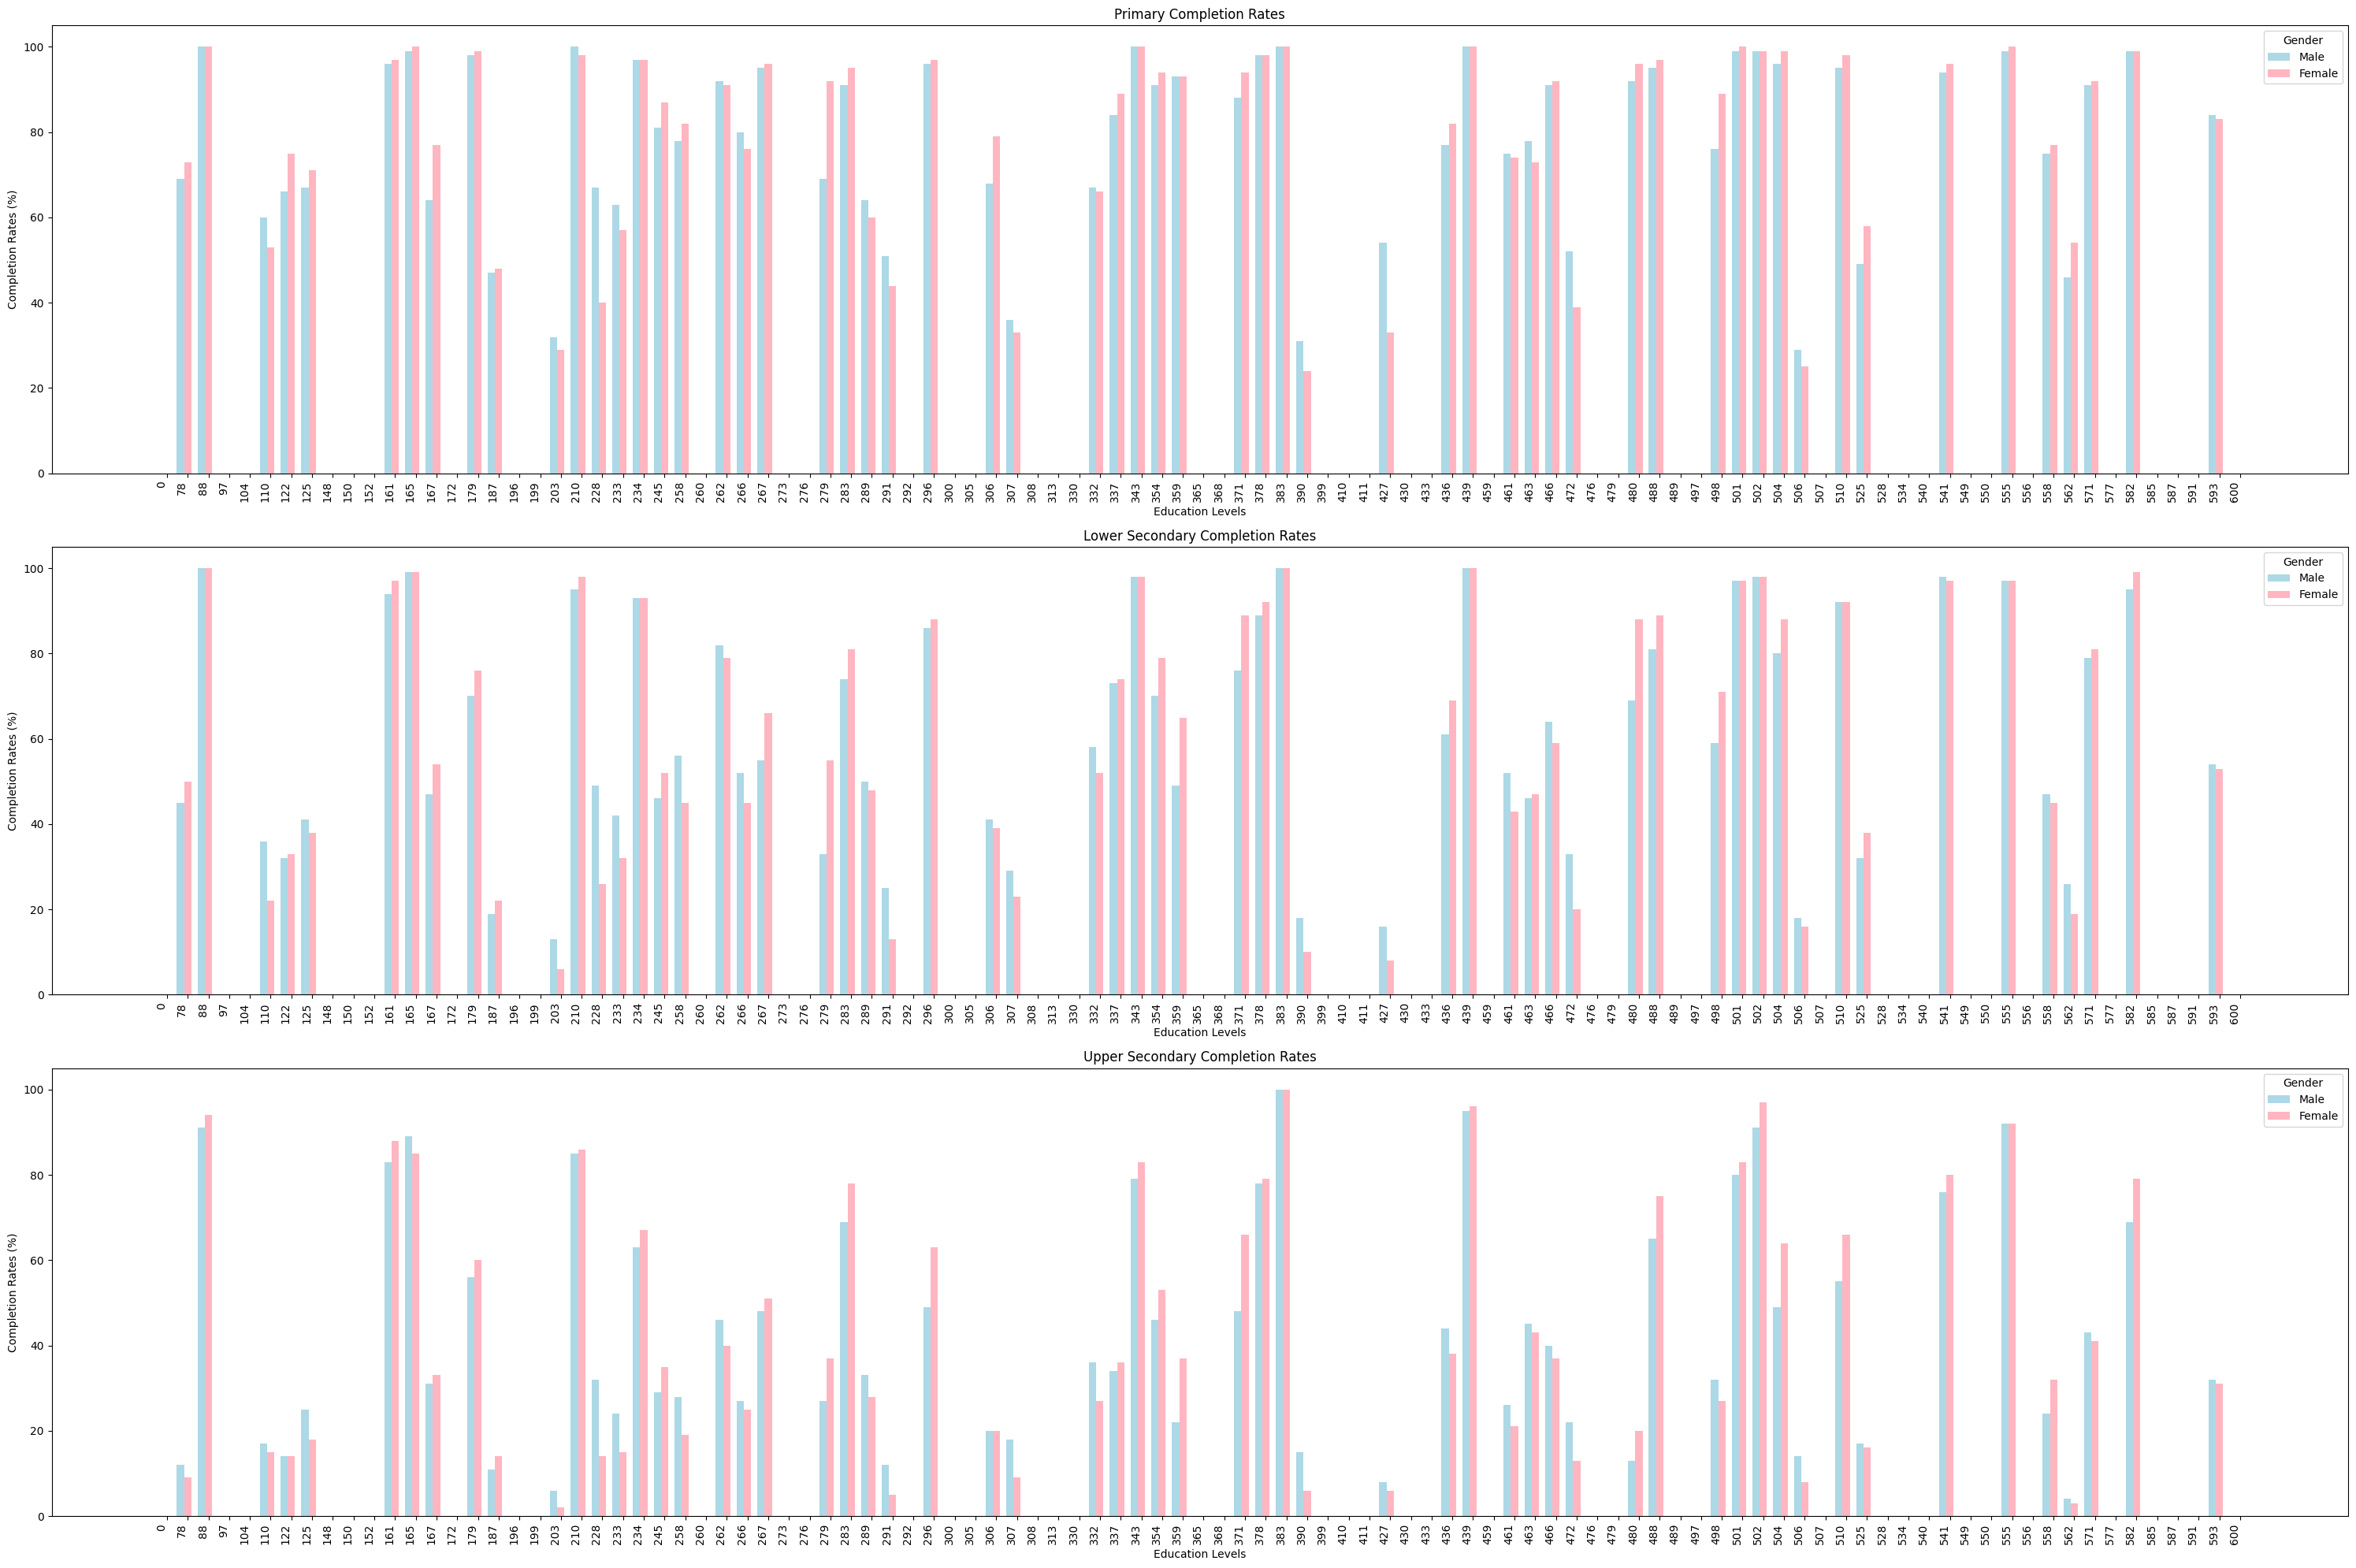

In [ ]:
# Getting the education levels, excluding the repeated and 0 values [7]
education_levels = global_education['Total_Completion_Rate'].unique()

# Sorting the education levels [6 How to sort an array using NumPy using the indexes]
sorted_index = np.argsort(education_levels)

# Creating subplots for primary education and setting the size of the graph to display [7] 
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(30, 20))
plt.xticks(rotation=90)

# Setting the width of the bars
bar_width = 0.35
index = np.arange(len(education_levels)) # [7]

# Plotting primary completion rates [6 How do I adjust the bar positions in a Matplotlib bar chart?]
ax1.bar(index - bar_width, global_education['Completion_Rate_Primary_Male'][sorted_index], bar_width, label='Male', color='lightblue')
ax1.bar(index, global_education['Completion_Rate_Primary_Female'][sorted_index], bar_width, label='Female', color='lightpink')

# Adding the title, x and y labels to the bar graph
ax1.set_xlabel('Education Levels')
ax1.set_ylabel('Completion Rates (%)')
ax1.set_title('Primary Completion Rates')

# Adjusting layout for better visualization [7]
ax1.set_xticks(index)
ax1.set_xticklabels(education_levels[sorted_index], rotation=90, ha='right')

# Adding a legend with the title 'Gender'
ax1.legend(title="Gender")

# Creating subplots for lower secondary education [6 How do I adjust the bar positions in a Matplotlib bar chart?]
ax2.bar(index - bar_width, global_education['Completion_Rate_Lower_Secondary_Male'][sorted_index], bar_width, label='Male', color='lightblue')
ax2.bar(index, global_education['Completion_Rate_Lower_Secondary_Female'][sorted_index], bar_width, label='Female', color='lightpink')

# Adding the title, x and y labels to the bar graph
ax2.set_xlabel('Education Levels')
ax2.set_ylabel('Completion Rates (%)')
ax2.set_title('Lower Secondary Completion Rates')

# Adjusting layout for better visualization [7]
ax2.set_xticks(index)
ax2.set_xticklabels(education_levels[sorted_index], rotation=90, ha='right')

# Adding a legend with the title 'Gender'
ax2.legend(title="Gender")

# Creating subplots for upper secondary education [7]
plt.xticks(rotation=90)

# Plotting upper secondary completion rates [6 How do I adjust the bar positions in a Matplotlib bar chart?]
ax3.bar(index - bar_width, global_education['Completion_Rate_Upper_Secondary_Male'][sorted_index], bar_width, label='Male', color='lightblue')
ax3.bar(index, global_education['Completion_Rate_Upper_Secondary_Female'][sorted_index], bar_width, label='Female',color='lightpink')

# Adding the title, x and y labels to the bar graph
ax3.set_xlabel('Education Levels')
ax3.set_ylabel('Completion Rates (%)')
ax3.set_title('Upper Secondary Completion Rates')

# Adjusting layout for better visualization [7]
ax3.set_xticks(index)
ax3.set_xticklabels(education_levels[sorted_index], rotation=90, ha='right')

# Adding a legend with the title 'Gender'
ax3.legend(title="Gender")

# Adjusting layout for better visualization
plt.tight_layout()

# Display [9]
plt.show()

In [ ]:
# [7] 

mean_completion_rate_primary_male = global_education['Completion_Rate_Primary_Male'].mean().round(2)
print(mean_completion_rate_primary_male)

mean_completion_rate_primary_female = global_education['Completion_Rate_Primary_Female'].mean().round(2)
print(mean_completion_rate_primary_female)

mean_completion_rate_lower_secondary_male = global_education['Completion_Rate_Lower_Secondary_Female'].mean().round(2)
print(mean_completion_rate_lower_secondary_male)

mean_completion_rate_lower_secondary_female = global_education['Completion_Rate_Lower_Secondary_Male'].mean().round(2)
print(mean_completion_rate_lower_secondary_female)

mean_completion_rate_upper_secondary_male = global_education['Completion_Rate_Upper_Secondary_Male'].mean().round(2)
print(mean_completion_rate_lower_secondary_male)

mean_completion_rate_upper_secondary_female = global_education['Completion_Rate_Upper_Secondary_Female'].mean().round(2)
print(mean_completion_rate_upper_secondary_female)

41.72
42.13
33.17
32.74
33.17
23.07


# *The grouped bar graph is separated for easy visualization, the bar graphs represent male and female completion rates for every stage*:
 For Primary Education, there are a lot more bars that reach 100%, and the graph is a lot more full, compared to the rest. This indicates more access to education in the early stages, and this initiates interest in education for the ones that choose to continue. In the lower secondary, many children leave school due to some unknown reason, which is why they are not present on the graph, and they do not complete their schooling. For Upper secondary, there is limited amount of children and many bars are left blank, indicating that there are a lot of children that dropped out of school for some reason. A potential reason why the children drop out, might be because they have to provide for their families and start working, or some other unknown reason. Overall, there are more males in school compared to females in some areas of the graph, and the opposite is true for some areas too. There are also some areas that have the same amount of females and males for completing education. The means indicate this well, as there is a drop about 10% each higher level of education, from primary education to lower secondary education to upper secondary education. 

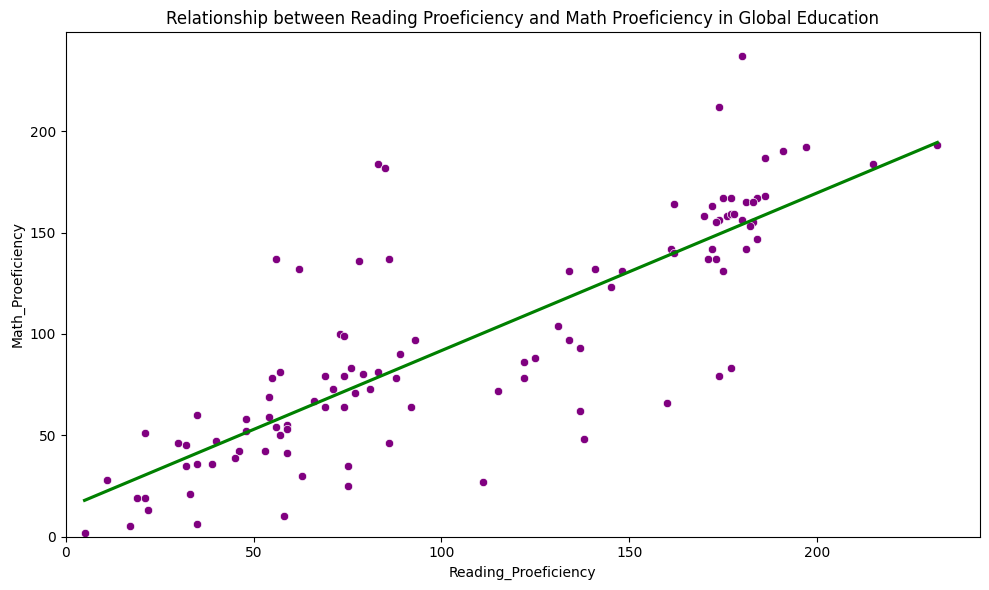

In [ ]:
# Plotting a scatter plot with its line of best fit for the relationship between Reading Proeficiency and Math Proeficiency

# Setting the size of the graph to display
plt.figure(figsize=(10, 6))

# Filter data to exclude zero values [6 How do I remove 0 values only in two columns of data in python]
data = global_education[(global_education['Reading_Proeficiency'] != 0) & (global_education['Math_Proeficiency'] != 0)]

# Scatter plot
sns.scatterplot(x='Reading_Proeficiency', y='Math_Proeficiency', data=data, color='purple')

# Line of best fit [6 How do I create a line of best fit using seaborn]
sns.regplot(x='Reading_Proeficiency', y='Math_Proeficiency', data=data, scatter=False, line_kws={'linestyle':'-'}, ci=None, color='green')

# Setting ranges to include positive values only [6 How do I set my values on the x and y axis to show positive values only]
plt.ylim(bottom=0)
plt.xlim(left=0)

# Adding the title, x and y labels to the scatterplot [7]
plt.xlabel('Reading_Proeficiency')
plt.ylabel('Math_Proeficiency')
plt.title('Relationship between Reading Proeficiency and Math Proeficiency in Global Education')

# Adjusting the layout for better visualization
plt.tight_layout()

# Display
plt.show()

In [ ]:
# [7]

mean_reading_proeficiency = global_education['Reading_Proeficiency'].mean().round(2)
print(mean_reading_proeficiency)

mean_math_proeficiency = global_education['Math_Proeficiency'].mean().round(2)
print(mean_math_proeficiency)

58.49
52.27


# *The scatterplot shows a positive moderate corelation between Reading Proeficiency and Math Proeficiency*:
 As reading proeficiency increases, the higher the math proeficiency is. This shows how reading is neccessary for understanding math topics, especially word problems, if a child is weak at reading, they would likely be weak at math as well. If a child is strong at reading, the likelier the child is going to be better at math, as they have the capability to understand complex word problems, etc. However, there are some mild outliers present, indicating that in the odd case, that there are children who are better at math then reading. The means of reading proeficiency is somewhat higher than the math proeficiency, indicating that there are more children that are better at reading, compared to math. This shows the overall trend that children who can read better, do better in math.

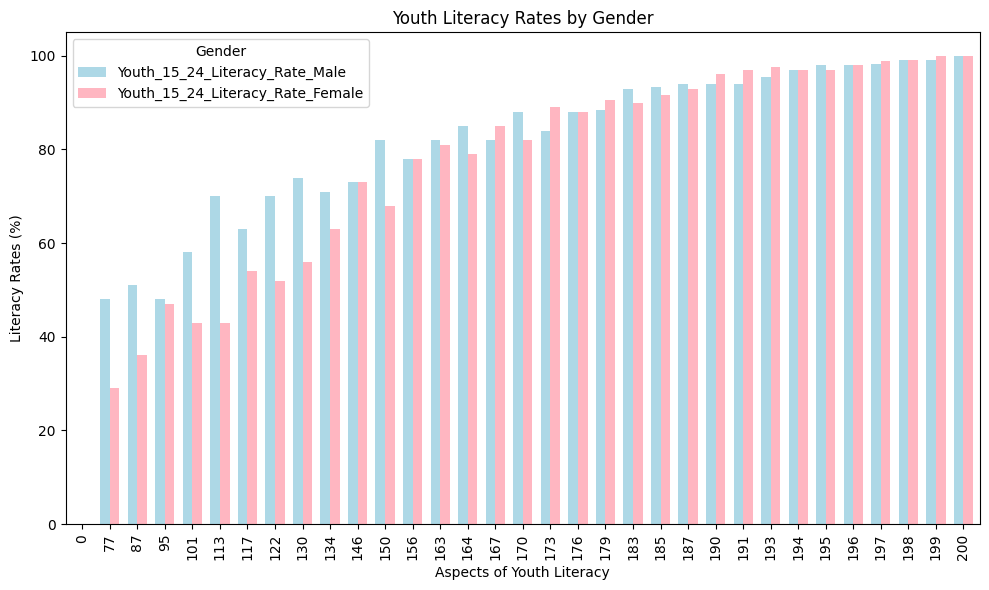

In [ ]:
# Grouping data by Youth Literacy and taking the average of the literacy rates for males and females [7]
Literacy_Total = global_education.groupby('Youth_Literacy')[['Youth_15_24_Literacy_Rate_Male', 'Youth_15_24_Literacy_Rate_Female']].mean()

# Setting the width of the bars for the bar plot
bar_width = 0.7

# Creating subplots for Youth Literacy and setting the size of the graph to display [7] 
fig, ax = plt.subplots(figsize=(10, 6))

# Creating a bar plot with different colors for male and female literacy rates [7]
Literacy_Total.plot(kind='bar', color=['lightblue', 'lightpink'], ax=ax, width=bar_width)

# Adding the title, x and y labels to the bar graph
plt.title('Youth Literacy Rates by Gender')
plt.xlabel('Aspects of Youth Literacy')
plt.ylabel('Literacy Rates (%)')

# Adding a legend with the title 'Gender'
plt.legend(title='Gender')

# Adjusting the layout for better visualization
plt.tight_layout()

# Display [9]
plt.show()

In [ ]:
# [7]

mean_youth_literacy_rate_male = global_education['Youth_15_24_Literacy_Rate_Male'].mean().round(2)
print(mean_youth_literacy_rate_male)

mean_youth_literacy_rate_female = global_education['Youth_15_24_Literacy_Rate_Female'].mean().round(2)
print(mean_youth_literacy_rate_female)

35.8
35.08


# *The bar graph represents youth literacy rates for males and females*:
 The males are initailly more literate than the females, but soon the females take the lead, and they become more literate than the males. Then in the end the males and females end up with the same literacy rates. There is an increase in access for education for both genders, which is why males and females are ending up with the same scores. There is definitely progress in todays economy, by bridging the gap between male and female education, shown in this graph by youth literacy. This would lead to better employment oppurtunities for females and males, and boost overall productivity in the workforce. Overall, the means are pretty close together, indicating an overall increase in the literacy rates for both genders.

## *Discussion*

The analysis reveals a positive correlation between gross enrollment and completed education, suggesting that increasing access to education leads to higher completion rates. This suggests that governments and policymakers should focus on initiatives to enhance enrollment and ensure more children have the opportunity to start and complete their education.

Gender disparities in education are evident across different stages, with males outperforming females in primary education but more males completing their studies in lower and upper secondary education. Governments and policymakers should work towards creating an inclusive educational environment to bridge these gaps.

Literacy rates show an encouraging trend, with females surpassing males over time, suggesting progress in providing educational opportunities for females. To sustain this positive trend, policies should continue promoting gender-inclusive education and dismantling barriers that may disproportionately affect one gender.

Education impacts Unemployment rates vary across countries. Countries that may face challenges in providing adequate educational opportunities, leading to potential gaps in completion rates have higher unemployment rates, such as South Africa and Lesotho. High birth rates in countries like Niger and Chad could strain educational resources, emphasizing the need for family planning and targeted educational programs.

The positive correlation between reading and math proficiency highlights the importance of comprehensive literacy programs and integrated approaches to foster both skills. Policymakers can leverage these findings to inform evidence-based strategies to create more inclusive, equitable, and effective education systems.

## *References*

1. Source data - https://www.kaggle.com/datasets/nelgiriyewithana/world-educational-data
2. Pandas for data manipulation
3. Seaborn for data viz
4. Matplotlib for data viz
5. Numpy for data manipulation
6. ChatGPT
7. Class Notes
8. https://bobbyhadz.com/blog/pandas-drop-columns-if-name-contains-string#drop-columns-if-name-contains-a-given-string-using-strcontains
9. https://www.activestate.com/resources/quick-reads/how-to-display-a-plot-in-python/